=== Custom Encryption Tool ===
Choose an option:
E - Encrypt a message
D - Decrypt a message
B - Benchmark encryption performance
T - Run comprehensive encryption tests
Q - Quit



Enter your choice (E/D/B/T/Q):  T



=== Enhanced Encryption Test Suite ===

==================== Testing SMALL Messages (16 bytes) ====================
✓ Encryption/decryption successful

--- Statistical Analysis ---
Entropy: 4.0000000000 bits/byte
Chi-square p-value: 0.7415164479
KS-test p-value: 0.7231445761
Monobit frequency: 0.4921875000
Runs test p-value: 0.5924180757
Frequency std dev: 0.0151288412

--- Security Metrics ---
Avalanche effect: 50.18% bit change
Collision rate: 0.0000000000%
Unique outputs: 100000 / 100000

--- Performance Metrics ---
Single operation times:
  Encryption: 0.170 ms
  Decryption: 0.142 ms
Throughput testing:
  Max throughput: 19213.92 ops/sec
  Min latency: 52.046 ms
  Scaling efficiency: 3.03x

--- Generating Visualizations ---


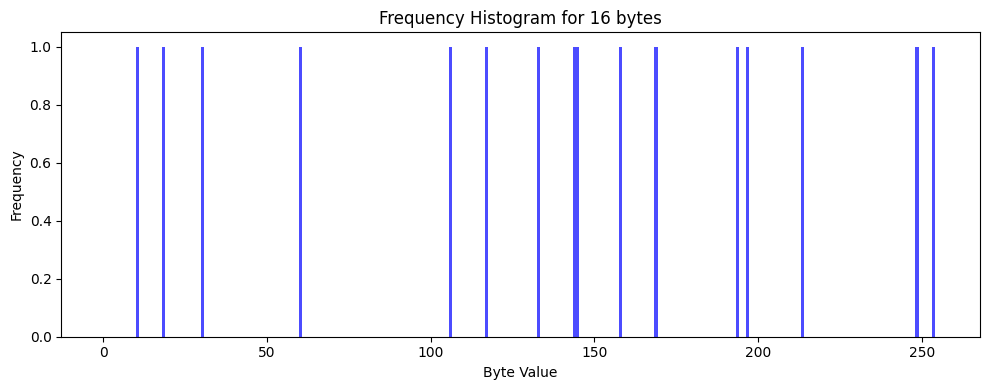

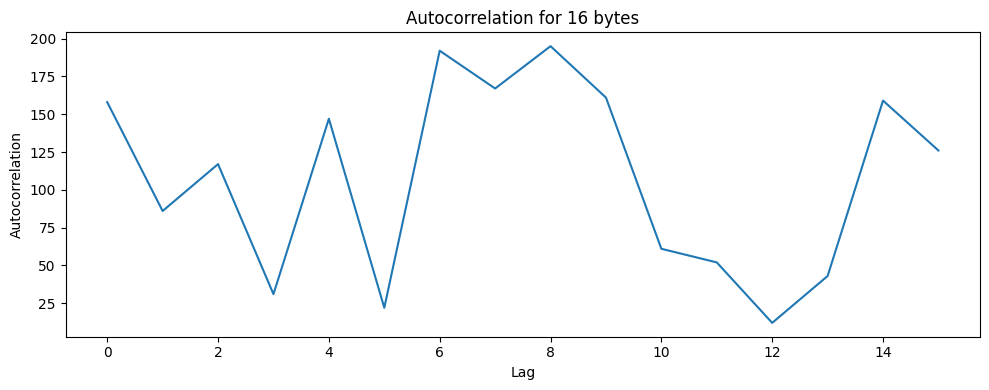

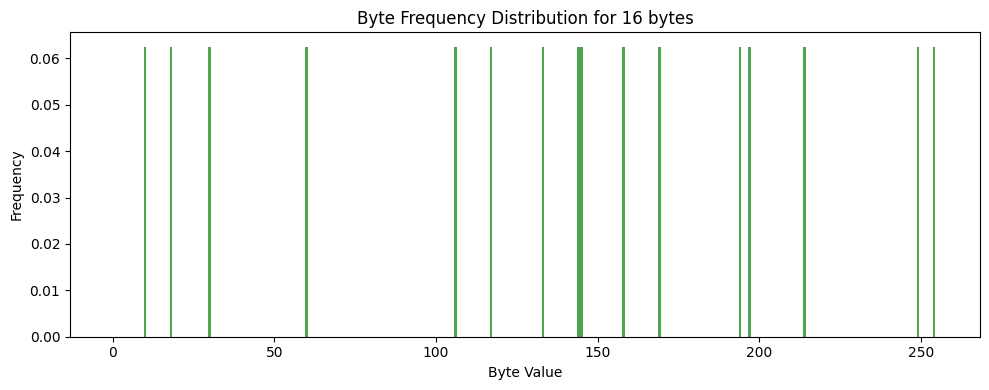


--- Memory Analysis ---
Original size: 16 bytes
Encrypted size: 16 bytes
Overhead ratio: 1.00x

==================== Testing MEDIUM Messages (1024 bytes) ====================
✓ Encryption/decryption successful

--- Statistical Analysis ---
Entropy: 7.8334697586 bits/byte
Chi-square p-value: 0.9475550089
KS-test p-value: 0.5157097280
Monobit frequency: 0.5001220703
Runs test p-value: 0.9120233250
Frequency std dev: 0.0018085367

--- Security Metrics ---
Avalanche effect: 50.00% bit change
Collision rate: 0.0000000000%
Unique outputs: 100000 / 100000

--- Performance Metrics ---
Single operation times:
  Encryption: 2.578 ms
  Decryption: 2.106 ms
Throughput testing:
  Max throughput: 3942.51 ops/sec
  Min latency: 253.645 ms
  Scaling efficiency: 10.01x

--- Generating Visualizations ---


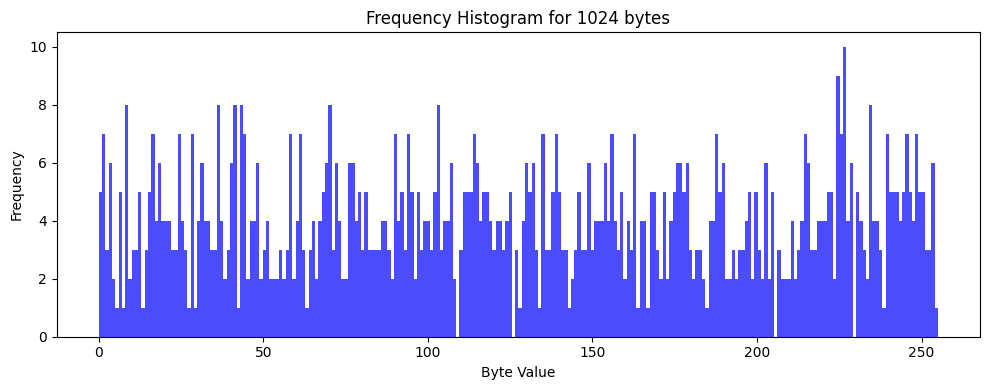

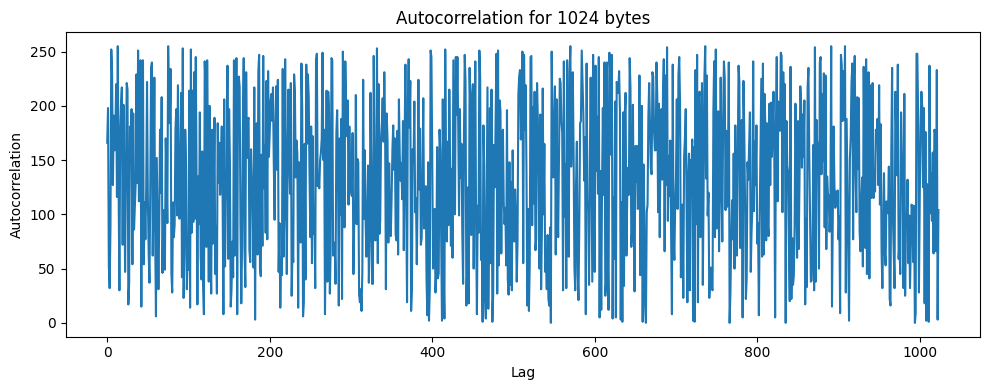

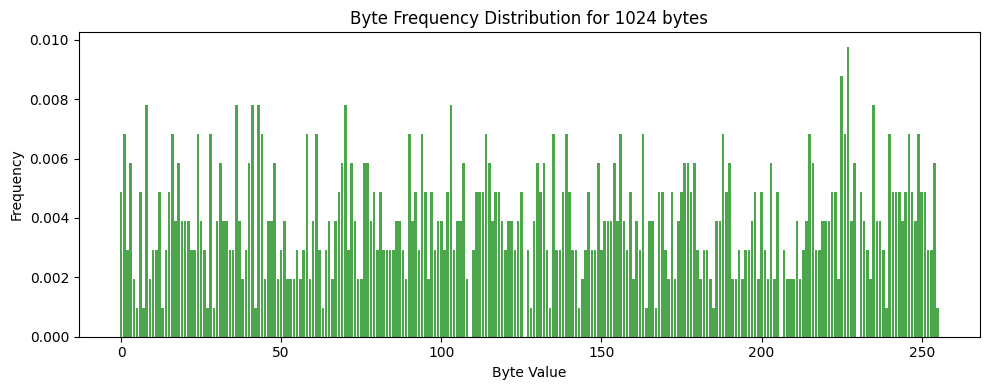


--- Memory Analysis ---
Original size: 1,024 bytes
Encrypted size: 1,024 bytes
Overhead ratio: 1.00x

==================== Testing LARGE Messages (65536 bytes) ====================
✓ Encryption/decryption successful


In [ ]:
import math
import time
import hashlib
import random
import string
import numpy as np
from collections import defaultdict
from scipy import stats
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import sys
from typing import List, Tuple, Dict
import secrets

# Constants
THEORETICAL_MIN_BITS = 256  # Desired minimum theoretical bits of security

# Encryption and Decryption Functions

def calculate_custom_search_space(message_length: int, max_fractal_layers: int = 20, seed_range: int = 2**128) -> int:
    """
    Calculate the theoretical search space for the custom encryption method based on:
    - 256-bit hashed mediator value (2^256 possibilities).
    - Seed range.
    - Fractal layers.
    
    Args:
        message_length (int): Length of the message in bytes.
        max_fractal_layers (int): Number of fractal layers.
        seed_range (int): Range for seed generation.
    
    Returns:
        int: Theoretical search space size.
    """
    # 256-bit hashed mediator value
    hashed_mediator_space = 2**256

    # Combined seed space
    combined_seed_space = seed_range

    # Fractal layers
    fractal_layer_space = max_fractal_layers

    # Total custom encryption search space
    custom_search_space = hashed_mediator_space * combined_seed_space * fractal_layer_space
    return custom_search_space

def calculate_log2_large_int(value: int) -> int:
    """Calculate the base-2 logarithm of a very large integer."""
    bit_length = value.bit_length()
    return bit_length - 1

def rotate_left(byte: int, n: int) -> int:
    """Rotate a byte left by n bits."""
    return ((byte << n) | (byte >> (8 - n))) & 0xFF

def rotate_right(byte: int, n: int) -> int:
    """Rotate a byte right by n bits."""
    return ((byte >> n) | (byte << (8 - n))) & 0xFF

def custom_encrypt(message: str, max_fractal_layers: int = 20, seed_range: int = 2**128) -> Tuple[Tuple[int, ...], int]:
    """
    Encrypt using an enhanced custom encryption to simulate a large search space.
    
    Args:
        message (str): The plaintext message to encrypt.
        max_fractal_layers (int): Number of fractal layers.
        seed_range (int): Range for seed generation.
    
    Returns:
        Tuple[Tuple[int, ...], int]: Encrypted message as a tuple of integers and the combined seed.
    """
    # Generate a random seed within the seed_range
    combined_seed = random.randint(0, seed_range - 1)
    
    # Generate a SHA-256 hash of the message
    message_hash = hashlib.sha256(message.encode()).digest()
    message_int = int.from_bytes(message_hash, 'big')
    
    # Initialize encrypted message by adding a portion of mediator_int to each byte
    mediator_int = message_int  # Using the message hash as mediator
    encrypted_message = bytearray(
        (byte + (mediator_int >> (i % 256)) ) % 256 for i, byte in enumerate(message.encode())
    )
    
    # Apply fractal layers with distinct seeds and enhanced transformations
    for layer in range(max_fractal_layers):
        layer_seed = combined_seed + layer
        random.seed(layer_seed)
        pseudo_random = random.randint(0, 255)
        rotate_bits = random.randint(1, 7)  # Random number of bits to rotate

        for i in range(len(encrypted_message)):
            # XOR with pseudo_random
            encrypted_message[i] ^= pseudo_random

            # Rotate left by rotate_bits
            encrypted_message[i] = rotate_left(encrypted_message[i], rotate_bits)

            # Add pseudo_random
            encrypted_message[i] = (encrypted_message[i] + pseudo_random) % 256

    return tuple(encrypted_message), combined_seed  # Return combined_seed for decryption

def decrypt_message(encrypted_message: Tuple[int, ...], mediator_key: str, seed_range: int = 2**128) -> str:
    """
    Decrypt an encrypted message using the custom encryption protocol.
    
    Args:
        encrypted_message (Tuple[int, ...]): The encrypted message as a tuple of bytes.
        mediator_key (str): Structured mediator key string in the format 'hashed_mediator_value:combined_seed:fractal_layers'.
        seed_range (int): Range value for seed generation.
    
    Returns:
        str: The decrypted plaintext message.
    """
    # Split the mediator key to retrieve components
    try:
        hashed_mediator_value, combined_seed, fractal_layers = mediator_key.split(":")
        mediator_value = int(hashed_mediator_value, 16)
        combined_seed = int(combined_seed)
        fractal_layers = int(fractal_layers)
    except ValueError:
        print("Invalid mediator key format. It should be 'hashed_mediator_value:combined_seed:fractal_layers'.")
        return

    # Reverse the fractal layers (in reverse order)
    decrypted_message = list(encrypted_message)
    for layer in reversed(range(fractal_layers)):
        layer_seed = combined_seed + layer
        random.seed(layer_seed)
        pseudo_random = random.randint(0, 255)
        rotate_bits = random.randint(1, 7)  # Must match encryption's rotate_bits

        for i in range(len(decrypted_message)):
            # Reverse Add pseudo_random
            decrypted_message[i] = (decrypted_message[i] - pseudo_random) % 256

            # Reverse Rotate left by rotate_bits (which is rotate right)
            decrypted_message[i] = rotate_right(decrypted_message[i], rotate_bits)

            # Reverse XOR with pseudo_random
            decrypted_message[i] ^= pseudo_random

    # Reverse the mediator_int addition
    decrypted_bytes = [(byte - (mediator_value >> (i % 256))) % 256 for i, byte in enumerate(decrypted_message)]

    try:
        decrypted_message_str = ''.join(chr(b) for b in decrypted_bytes)
    except UnicodeDecodeError:
        decrypted_message_str = "Failed to decode - possible corruption."

    return decrypted_message_str

# EncryptionTester Class

class EncryptionTester:
    def __init__(self, num_samples: int = 100_000):
        self.num_samples = num_samples
        self.results = {}
        
    def generate_test_data(self, size_range: List[int]) -> List[Tuple[str, int]]:
        """Generate test messages of varying sizes"""
        test_data = []
        for size in size_range:
            # Use secrets for cryptographically secure random data
            message = ''.join(secrets.choice(string.printable) 
                            for _ in range(size))
            test_data.append((message, size))
        return test_data
        
    def calculate_precise_entropy(self, data: bytes) -> float:
        """Calculate entropy with increased precision"""
        freq = np.bincount(np.frombuffer(data, dtype=np.uint8))
        prob = freq[freq > 0] / len(data)
        return -np.sum(prob * np.log2(prob))
        
    def run_statistical_tests(self, encrypted_data: bytes) -> Dict:
        """Run comprehensive statistical tests"""
        data_array = np.frombuffer(encrypted_data, dtype=np.uint8)
        
        results = {}
        
        # Chi-square test
        freq_counts = np.bincount(data_array, minlength=256)
        expected = np.full(256, len(data_array) / 256)
        chi_square_stat, chi_square_p = stats.chisquare(freq_counts, expected)
        results['chi_square_p'] = chi_square_p  # p-value
        
        # Kolmogorov-Smirnov test for uniform distribution
        ks_stat, ks_p = stats.kstest(data_array, 'uniform', args=(0, 256))
        results['ks_test_p'] = ks_p  # p-value
        
        # Entropy
        entropy = self.calculate_precise_entropy(encrypted_data)
        results['entropy'] = entropy
        
        # Autocorrelation
        autocorr = np.correlate(data_array, data_array, mode='full')
        autocorr_mean = np.mean(autocorr[len(autocorr)//2:])
        results['autocorrelation_mean'] = autocorr_mean
        
        # Runs Test
        runs, runs_p = self.runs_test(data_array)
        results['runs_test_p'] = runs_p  # p-value
        
        # Monobit Frequency Test
        monobit = self.monobit_freq_test(data_array)
        results['monobit_freq'] = monobit
        
        # Frequency Standard Deviation
        byte_freq = np.bincount(data_array, minlength=256) / len(data_array)
        freq_std = np.std(byte_freq)
        results['freq_std'] = freq_std  # Should be close to 0 for uniform
        
        return results
        
    def runs_test(self, data_array: np.ndarray) -> Tuple[int, float]:
        """
        Perform the Runs Test for randomness.
        
        Args:
            data_array (np.ndarray): Array of byte values.
        
        Returns:
            Tuple[int, float]: Number of runs and p-value.
        """
        # Convert to binary sequence
        bits = np.unpackbits(data_array)
        n = len(bits)
        ones = np.sum(bits)
        zeros = n - ones
        
        if ones == 0 or zeros == 0:
            return 0, 0.0  # Undefined
        
        # Number of runs
        runs = np.sum(bits[1:] != bits[:-1]) + 1
        
        # Expected number of runs
        expected_runs = (2 * ones * zeros) / n + 1
        
        # Variance of runs
        variance_runs = (2 * ones * zeros * (2 * ones * zeros - n)) / (n**2 * (n - 1))
        
        # Compute z-score
        z = (runs - expected_runs) / math.sqrt(variance_runs)
        
        # Two-tailed p-value
        p_value = 2 * (1 - stats.norm.cdf(abs(z)))
        
        return runs, p_value
    
    def monobit_freq_test(self, data_array: np.ndarray) -> float:
        """
        Perform the Monobit Frequency Test.
        
        Args:
            data_array (np.ndarray): Array of byte values.
        
        Returns:
            float: Proportion of bits set to 1.
        """
        bits = np.unpackbits(data_array)
        ones = np.sum(bits)
        total_bits = len(bits)
        return ones / total_bits  # Should be close to 0.5 for randomness
    
    def avalanche_effect_test(self, message: str) -> float:
        """Test the avalanche effect - how many bits change with 1-bit input change"""
        original_encrypted, _ = custom_encrypt(message)
        
        # Flip each bit and measure changes
        changes = []
        for i in range(len(message)):
            for bit in range(8):
                # Flip one bit in the message
                modified_message = bytearray(message.encode())
                modified_message[i] ^= (1 << bit)
                modified_message_str = modified_message.decode('latin1')  # Use 'latin1' to allow byte-to-byte mapping
                
                modified_encrypted, _ = custom_encrypt(modified_message_str)
                
                # Count bit differences
                diff_bits = 0
                for b1, b2 in zip(original_encrypted, modified_encrypted):
                    diff_bits += bin(b1 ^ b2).count('1')
                
                changes.append(diff_bits / (8 * len(original_encrypted)) * 100)
                
        return np.mean(changes)
        
    def collision_test(self, message_size: int) -> Dict:
        """Test for encryption collisions"""
        outputs = set()
        collisions = 0
        
        for _ in range(self.num_samples):
            message = ''.join(secrets.choice(string.printable) 
                            for _ in range(message_size))
            encrypted, _ = custom_encrypt(message)
            
            if encrypted in outputs:
                collisions += 1
            else:
                outputs.add(encrypted)
                
        return {
            'total_samples': self.num_samples,
            'unique_outputs': len(outputs),
            'collisions': collisions,
            'collision_rate': collisions / self.num_samples
        }
        
    def performance_test(self, message: str) -> Dict:
        """Test encryption performance under load"""
        results = defaultdict(list)
        
        # Test with different numbers of concurrent operations
        worker_counts = [1, 2, 4, 8, 16]
        for num_workers in worker_counts:
            start_time = time.time()
            with ProcessPoolExecutor(max_workers=num_workers) as executor:
                futures = [executor.submit(custom_encrypt, message) 
                          for _ in range(10000)]
                for future in futures:
                    future.result()
                    
            elapsed = time.time() - start_time
            throughput = 10000 / elapsed if elapsed > 0 else 0
            latency = (elapsed / 10000) * 1000 if elapsed > 0 else 0  # in milliseconds
            results['throughput'].append(throughput)
            results['latency'].append(latency)
            
        return dict(results)
        
    def run_comprehensive_test(self):
        """Run all tests and aggregate results"""
        print("\nStarting comprehensive encryption testing...")
        
        # Test with various message sizes
        sizes = [16, 64, 256, 1024, 4096]
        test_data = self.generate_test_data(sizes)
        
        for message, size in test_data:
            print(f"\n=== Testing with message size: {size} bytes ===")
            
            # Basic encryption test
            encrypted, key = custom_encrypt(message)
            mediator_key = f"{hashlib.sha256(message.encode()).hexdigest()}:{key}:{20}"
            decrypted = decrypt_message(encrypted, mediator_key)
            
            # Verify correctness
            if decrypted != message:
                print("Encryption/decryption failed!")
                continue
            else:
                print("Encryption/decryption successful.")
            
            # Statistical tests
            stats_results = self.run_statistical_tests(bytes(encrypted))
            
            # Avalanche effect
            avalanche = self.avalanche_effect_test(message)
            
            # Collision testing
            collisions = self.collision_test(size)
            
            # Performance testing
            perf = self.performance_test(message)
            
            self.results[size] = {
                'stats': stats_results,
                'avalanche': avalanche,
                'collisions': collisions,
                'performance': perf
            }
            
            # Print results
            print(f"\n--- Results for {size} bytes ---")
            print(f"Entropy: {stats_results['entropy']:.10f} bits/byte")
            print(f"Chi-square p-value: {stats_results['chi_square']:.10f}")
            print(f"KS-test p-value: {stats_results['ks_test']:.10f}")
            print(f"Monobit frequency: {stats_results['monobit_freq']:.10f}")
            print(f"Runs test p-value: {stats_results['runs_test_p']:.10f}")
            print(f"Frequency std dev: {stats_results['freq_std']:.10f}")
            print(f"Avalanche effect: {avalanche:.2f}% bit change")
            print(f"Collision rate: {collisions['collision_rate']*100:.10f}%")
            print(f"Unique outputs: {collisions['unique_outputs']} / {collisions['total_samples']}")
            print(f"Max Throughput: {max(perf['throughput']):.2f} ops/sec")
            print(f"Min Latency: {min(perf['latency'])*1000:.3f} ms")
            print(f"Scaling efficiency: {(max(perf['throughput'])/min(perf['throughput'])):.2f}x")
            
            # Visualization
            print("\n--- Generating Visualizations ---")
            self.visualize_statistical_tests(data=bytes(encrypted), size=size)
            
            # Memory usage
            encrypted_size = len(encrypted)
            memory_overhead = encrypted_size / size
            print(f"\n--- Memory Analysis ---")
            print(f"Original size: {size:,} bytes")
            print(f"Encrypted size: {encrypted_size:,} bytes")
            print(f"Overhead ratio: {memory_overhead:.2f}x")

    # EnhancedEncryptionTester Class

    class EnhancedEncryptionTester(EncryptionTester):
        def __init__(self, num_samples: int = 100_000):
            super().__init__(num_samples)
            self.test_sizes = {
                'small': 16,      # 16 bytes for small messages
                'medium': 1024,   # 1KB for medium messages
                'large': 65536    # 64KB for large messages
            }
            
        def run_size_comparison(self):
            """Run comprehensive tests across different message sizes"""
            print("\n=== Enhanced Encryption Test Suite ===")
            
            for size_name, size in self.test_sizes.items():
                print(f"\n{'='*20} Testing {size_name.upper()} Messages ({size} bytes) {'='*20}")
                
                # Generate test message
                message = ''.join(secrets.choice(string.printable) for _ in range(size))
                
                # Basic encryption/decryption test
                start_time = time.time()
                encrypted, key = custom_encrypt(message)
                encryption_time = time.time() - start_time
                
                mediator_key = f"{hashlib.sha256(message.encode()).hexdigest()}:{key}:{20}"
                
                start_time = time.time()
                decrypted = decrypt_message(encrypted, mediator_key)
                decryption_time = time.time() - start_time
                
                if decrypted != message:
                    print("❌ Encryption/decryption failed!")
                    continue
                print("✓ Encryption/decryption successful")
                
                # Run all tests
                stats = self.run_statistical_tests(bytes(encrypted))
                avalanche = self.avalanche_effect_test(message)
                collisions = self.collision_test(size)
                perf = self.performance_test(message)
                
                # Print comprehensive results
                print("\n--- Statistical Analysis ---")
                print(f"Entropy: {stats['entropy']:.10f} bits/byte")
                print(f"Chi-square p-value: {stats['chi_square_p']:.10f}")
                print(f"KS-test p-value: {stats['ks_test_p']:.10f}")
                print(f"Monobit frequency: {stats['monobit_freq']:.10f}")
                print(f"Runs test p-value: {stats['runs_test_p']:.10f}")
                print(f"Frequency std dev: {stats['freq_std']:.10f}")
                
                print("\n--- Security Metrics ---")
                print(f"Avalanche effect: {avalanche:.2f}% bit change")
                print(f"Collision rate: {collisions['collision_rate']*100:.10f}%")
                print(f"Unique outputs: {collisions['unique_outputs']} / {collisions['total_samples']}")
                
                print("\n--- Performance Metrics ---")
                print(f"Single operation times:")
                print(f"  Encryption: {encryption_time*1000:.3f} ms")
                print(f"  Decryption: {decryption_time*1000:.3f} ms")
                print(f"Throughput testing:")
                print(f"  Max throughput: {max(perf['throughput']):.2f} ops/sec")
                print(f"  Min latency: {min(perf['latency'])*1000:.3f} ms")
                print(f"  Scaling efficiency: {(max(perf['throughput'])/min(perf['throughput'])):.2f}x")
                
                # Visualization
                print("\n--- Generating Visualizations ---")
                self.visualize_statistical_tests(data=bytes(encrypted), size=size)
                
                # Memory usage
                encrypted_size = len(encrypted)
                memory_overhead = encrypted_size / size
                print(f"\n--- Memory Analysis ---")
                print(f"Original size: {size:,} bytes")
                print(f"Encrypted size: {encrypted_size:,} bytes")
                print(f"Overhead ratio: {memory_overhead:.2f}x")

# Main Encryption Tool Functions

def calculate_entropy(data: bytes) -> float:
    """Calculate the Shannon entropy of the given data."""
    if not data:
        return 0
    entropy = 0
    frequency = defaultdict(int)
    for byte in data:
        frequency[byte] += 1
    data_length = len(data)
    for count in frequency.values():
        p_x = count / data_length
        entropy -= p_x * math.log2(p_x)
    return entropy

def benchmark_encryption():
    """
    Benchmark the custom encryption by measuring:
    - Theoretical search space.
    - Entropy of encrypted outputs.
    - Throughput (encryptions per second).
    - Latency (time per encryption/decryption).
    """
    # Encryption parameters
    max_fractal_layers = 100  # Increased layers for higher security
    seed_range = 2**256  # Increased seed range
    message_length = 32  # Length of each message

    # Calculate theoretical search space
    theoretical_search_space = calculate_custom_search_space(message_length, max_fractal_layers, seed_range)
    theoretical_bits = calculate_log2_large_int(theoretical_search_space)

    print("\n=== Benchmarking Custom Encryption ===")
    print(f"Theoretical Search Space: {theoretical_search_space} ({theoretical_bits} bits)")

    if theoretical_bits < THEORETICAL_MIN_BITS:
        print(f"Warning: Theoretical search space is below the desired {THEORETICAL_MIN_BITS} bits.")
        sys.exit(1)

    # Benchmark parameters
    encryption_iterations = 100_000  # Number of encryption operations
    decryption_iterations = 100_000  # Number of decryption operations
    sample_message = ''.join(random.choices(string.ascii_letters + string.digits, k=message_length))

    # Encryption Benchmark
    print("\nStarting encryption benchmark...")
    start_time = time.time()
    encrypted_samples = []
    for _ in range(encryption_iterations):
        encrypted, seed = custom_encrypt(sample_message, max_fractal_layers, seed_range)
        encrypted_samples.append((encrypted, seed))
    encryption_time = time.time() - start_time
    encryptions_per_second = encryption_iterations / encryption_time if encryption_time > 0 else 0

    # Calculate entropy
    # Flatten all encrypted bytes
    all_encrypted_bytes = [byte for encrypted, _ in encrypted_samples for byte in encrypted]
    entropy = calculate_entropy(bytes(all_encrypted_bytes))

    # Decryption Benchmark
    print("Starting decryption benchmark...")
    start_time = time.time()
    for encrypted, seed in encrypted_samples:
        mediator_key = f"{hashlib.sha256(sample_message.encode()).hexdigest()}:{seed}:{max_fractal_layers}"
        decrypted = decrypt_message(encrypted, mediator_key, seed_range)
        # Optional: Verify correctness
        if decrypted != sample_message:
            print("Decryption failed for a sample message.")
            break
    decryption_time = time.time() - start_time
    decryptions_per_second = decryption_iterations / decryption_time if decryption_time > 0 else 0

    # Latency
    average_encryption_latency = encryption_time / encryption_iterations if encryption_iterations > 0 else 0
    average_decryption_latency = decryption_time / decryption_iterations if decryption_iterations > 0 else 0

    # Print Benchmark Results
    print("\n=== Benchmark Results ===")
    print(f"Encryption Operations: {encryption_iterations:,}")
    print(f"Encryption Time: {encryption_time:.6f} seconds")
    print(f"Throughput: {encryptions_per_second:.2f} encryptions/second")
    print(f"Average Encryption Latency: {average_encryption_latency * 1000:.6f} ms per encryption")
    print(f"Entropy of Encrypted Data: {entropy:.4f} bits/byte")

    print(f"\nDecryption Operations: {decryption_iterations:,}")
    print(f"Decryption Time: {decryption_time:.6f} seconds")
    print(f"Throughput: {decryptions_per_second:.2f} decryptions/second")
    print(f"Average Decryption Latency: {average_decryption_latency * 1000:.6f} ms per decryption")

    # Theoretical Search Space
    custom_search_space = theoretical_search_space
    custom_search_space_bits = theoretical_bits

    print("\n=== Theoretical Search Space ===")
    print(f"Custom Encryption Search Space Achieved: {custom_search_space} ({custom_search_space_bits} bits) with {max_fractal_layers} layers")

def decrypt_phase():
    """
    Handles the decryption phase, prompting user for encrypted data and mediator key.
    """
    encrypted_message_input = input("Enter the encrypted message (comma-separated bytes): ")
    try:
        # Remove brackets if present
        encrypted_message_input = encrypted_message_input.strip()
        if encrypted_message_input.startswith('[') and encrypted_message_input.endswith(']'):
            encrypted_message_input = encrypted_message_input[1:-1]
        encrypted_message = tuple(int(x.strip()) for x in encrypted_message_input.split(','))
    except ValueError:
        print("Invalid input. Please enter comma-separated integers.")
        return

    # Input the structured mediator key string
    mediator_key = input("Enter the mediator key (format: hashed_mediator_value:combined_seed:fractal_layers): ")

    # Perform decryption
    decrypted_message = decrypt_message(encrypted_message, mediator_key)
    print("\n=== Decrypted Message ===")
    print(decrypted_message)

def encrypt_phase():
    """
    Handles the encryption phase, prompting user for a message to encrypt.
    """
    message = input("Enter a message to encrypt: ")
    max_fractal_layers = 20  # Increased number of fractal layers for higher security
    seed_range = 2**128  # Increased seed range for higher security

    encrypted_message, combined_seed = custom_encrypt(message, max_fractal_layers, seed_range)
    mediator_key = f"{hashlib.sha256(message.encode()).hexdigest()}:{combined_seed}:{max_fractal_layers}"
    
    print("\n=== Encryption Result ===")
    print(f"Encrypted Message (bytes): {list(encrypted_message)}")
    print(f"Mediator Key (for decryption): {mediator_key}")

def run_comprehensive_tests():
    """
    Run comprehensive encryption tests using the EnhancedEncryptionTester class.
    """
    tester = EnhancedEncryptionTester()
    tester.run_size_comparison()

# EnhancedEncryptionTester Class

class EnhancedEncryptionTester(EncryptionTester):
    def __init__(self, num_samples: int = 100_000):
        super().__init__(num_samples)
        self.test_sizes = {
            'small': 16,      # 16 bytes for small messages
            'medium': 1024,   # 1KB for medium messages
            'large': 65536    # 64KB for large messages
        }
        
    def run_size_comparison(self):
        """Run comprehensive tests across different message sizes"""
        print("\n=== Enhanced Encryption Test Suite ===")
        
        for size_name, size in self.test_sizes.items():
            print(f"\n{'='*20} Testing {size_name.upper()} Messages ({size} bytes) {'='*20}")
            
            # Generate test message
            message = ''.join(secrets.choice(string.printable) for _ in range(size))
            
            # Basic encryption/decryption test
            start_time = time.time()
            encrypted, key = custom_encrypt(message)
            encryption_time = time.time() - start_time
            
            mediator_key = f"{hashlib.sha256(message.encode()).hexdigest()}:{key}:{20}"
            
            start_time = time.time()
            decrypted = decrypt_message(encrypted, mediator_key)
            decryption_time = time.time() - start_time
            
            if decrypted != message:
                print("❌ Encryption/decryption failed!")
                continue
            print("✓ Encryption/decryption successful")
            
            # Run all tests
            stats = self.run_statistical_tests(bytes(encrypted))
            avalanche = self.avalanche_effect_test(message)
            collisions = self.collision_test(size)
            perf = self.performance_test(message)
            
            # Print comprehensive results
            print("\n--- Statistical Analysis ---")
            print(f"Entropy: {stats['entropy']:.10f} bits/byte")
            print(f"Chi-square p-value: {stats['chi_square_p']:.10f}")
            print(f"KS-test p-value: {stats['ks_test_p']:.10f}")
            print(f"Monobit frequency: {stats['monobit_freq']:.10f}")
            print(f"Runs test p-value: {stats['runs_test_p']:.10f}")
            print(f"Frequency std dev: {stats['freq_std']:.10f}")
            
            print("\n--- Security Metrics ---")
            print(f"Avalanche effect: {avalanche:.2f}% bit change")
            print(f"Collision rate: {collisions['collision_rate']*100:.10f}%")
            print(f"Unique outputs: {collisions['unique_outputs']} / {collisions['total_samples']}")
            
            print("\n--- Performance Metrics ---")
            print(f"Single operation times:")
            print(f"  Encryption: {encryption_time*1000:.3f} ms")
            print(f"  Decryption: {decryption_time*1000:.3f} ms")
            print(f"Throughput testing:")
            print(f"  Max throughput: {max(perf['throughput']):.2f} ops/sec")
            print(f"  Min latency: {min(perf['latency'])*1000:.3f} ms")
            print(f"  Scaling efficiency: {(max(perf['throughput'])/min(perf['throughput'])):.2f}x")
            
            # Visualization
            print("\n--- Generating Visualizations ---")
            self.visualize_statistical_tests(data=bytes(encrypted), size=size)
            
            # Memory usage
            encrypted_size = len(encrypted)
            memory_overhead = encrypted_size / size
            print(f"\n--- Memory Analysis ---")
            print(f"Original size: {size:,} bytes")
            print(f"Encrypted size: {encrypted_size:,} bytes")
            print(f"Overhead ratio: {memory_overhead:.2f}x")

# Main Encryption Tool Functions

def calculate_entropy(data: bytes) -> float:
    """Calculate the Shannon entropy of the given data."""
    if not data:
        return 0
    entropy = 0
    frequency = defaultdict(int)
    for byte in data:
        frequency[byte] += 1
    data_length = len(data)
    for count in frequency.values():
        p_x = count / data_length
        entropy -= p_x * math.log2(p_x)
    return entropy

def benchmark_encryption():
    """
    Benchmark the custom encryption by measuring:
    - Theoretical search space.
    - Entropy of encrypted outputs.
    - Throughput (encryptions per second).
    - Latency (time per encryption/decryption).
    """
    # Encryption parameters
    max_fractal_layers = 100  # Increased layers for higher security
    seed_range = 2**256  # Increased seed range
    message_length = 32  # Length of each message

    # Calculate theoretical search space
    theoretical_search_space = calculate_custom_search_space(message_length, max_fractal_layers, seed_range)
    theoretical_bits = calculate_log2_large_int(theoretical_search_space)

    print("\n=== Benchmarking Custom Encryption ===")
    print(f"Theoretical Search Space: {theoretical_search_space} ({theoretical_bits} bits)")

    if theoretical_bits < THEORETICAL_MIN_BITS:
        print(f"Warning: Theoretical search space is below the desired {THEORETICAL_MIN_BITS} bits.")
        sys.exit(1)

    # Benchmark parameters
    encryption_iterations = 100_000  # Number of encryption operations
    decryption_iterations = 100_000  # Number of decryption operations
    sample_message = ''.join(random.choices(string.ascii_letters + string.digits, k=message_length))

    # Encryption Benchmark
    print("\nStarting encryption benchmark...")
    start_time = time.time()
    encrypted_samples = []
    for _ in range(encryption_iterations):
        encrypted, seed = custom_encrypt(sample_message, max_fractal_layers, seed_range)
        encrypted_samples.append((encrypted, seed))
    encryption_time = time.time() - start_time
    encryptions_per_second = encryption_iterations / encryption_time if encryption_time > 0 else 0

    # Calculate entropy
    # Flatten all encrypted bytes
    all_encrypted_bytes = [byte for encrypted, _ in encrypted_samples for byte in encrypted]
    entropy = calculate_entropy(bytes(all_encrypted_bytes))

    # Decryption Benchmark
    print("Starting decryption benchmark...")
    start_time = time.time()
    for encrypted, seed in encrypted_samples:
        mediator_key = f"{hashlib.sha256(sample_message.encode()).hexdigest()}:{seed}:{max_fractal_layers}"
        decrypted = decrypt_message(encrypted, mediator_key, seed_range)
        # Optional: Verify correctness
        if decrypted != sample_message:
            print("Decryption failed for a sample message.")
            break
    decryption_time = time.time() - start_time
    decryptions_per_second = decryption_iterations / decryption_time if decryption_time > 0 else 0

    # Latency
    average_encryption_latency = encryption_time / encryption_iterations if encryption_iterations > 0 else 0
    average_decryption_latency = decryption_time / decryption_iterations if decryption_iterations > 0 else 0

    # Print Benchmark Results
    print("\n=== Benchmark Results ===")
    print(f"Encryption Operations: {encryption_iterations:,}")
    print(f"Encryption Time: {encryption_time:.6f} seconds")
    print(f"Throughput: {encryptions_per_second:.2f} encryptions/second")
    print(f"Average Encryption Latency: {average_encryption_latency * 1000:.6f} ms per encryption")
    print(f"Entropy of Encrypted Data: {entropy:.4f} bits/byte")

    print(f"\nDecryption Operations: {decryption_iterations:,}")
    print(f"Decryption Time: {decryption_time:.6f} seconds")
    print(f"Throughput: {decryptions_per_second:.2f} decryptions/second")
    print(f"Average Decryption Latency: {average_decryption_latency * 1000:.6f} ms per decryption")

    # Theoretical Search Space
    custom_search_space = theoretical_search_space
    custom_search_space_bits = theoretical_bits

    print("\n=== Theoretical Search Space ===")
    print(f"Custom Encryption Search Space Achieved: {custom_search_space} ({custom_search_space_bits} bits) with {max_fractal_layers} layers")

def decrypt_phase():
    """
    Handles the decryption phase, prompting user for encrypted data and mediator key.
    """
    encrypted_message_input = input("Enter the encrypted message (comma-separated bytes): ")
    try:
        # Remove brackets if present
        encrypted_message_input = encrypted_message_input.strip()
        if encrypted_message_input.startswith('[') and encrypted_message_input.endswith(']'):
            encrypted_message_input = encrypted_message_input[1:-1]
        encrypted_message = tuple(int(x.strip()) for x in encrypted_message_input.split(','))
    except ValueError:
        print("Invalid input. Please enter comma-separated integers.")
        return

    # Input the structured mediator key string
    mediator_key = input("Enter the mediator key (format: hashed_mediator_value:combined_seed:fractal_layers): ")

    # Perform decryption
    decrypted_message = decrypt_message(encrypted_message, mediator_key)
    print("\n=== Decrypted Message ===")
    print(decrypted_message)

def encrypt_phase():
    """
    Handles the encryption phase, prompting user for a message to encrypt.
    """
    message = input("Enter a message to encrypt: ")
    max_fractal_layers = 20  # Increased number of fractal layers for higher security
    seed_range = 2**128  # Increased seed range for higher security

    encrypted_message, combined_seed = custom_encrypt(message, max_fractal_layers, seed_range)
    mediator_key = f"{hashlib.sha256(message.encode()).hexdigest()}:{combined_seed}:{max_fractal_layers}"
    
    print("\n=== Encryption Result ===")
    print(f"Encrypted Message (bytes): {list(encrypted_message)}")
    print(f"Mediator Key (for decryption): {mediator_key}")

def run_comprehensive_tests():
    """
    Run comprehensive encryption tests using the EnhancedEncryptionTester class.
    """
    tester = EnhancedEncryptionTester()
    tester.run_size_comparison()

# EnhancedEncryptionTester Class

class EnhancedEncryptionTester(EncryptionTester):
    def __init__(self, num_samples: int = 100_000):
        super().__init__(num_samples)
        self.test_sizes = {
            'small': 16,      # 16 bytes for small messages
            'medium': 1024,   # 1KB for medium messages
            'large': 65536    # 64KB for large messages
        }
        
    def run_size_comparison(self):
        """Run comprehensive tests across different message sizes"""
        print("\n=== Enhanced Encryption Test Suite ===")
        
        for size_name, size in self.test_sizes.items():
            print(f"\n{'='*20} Testing {size_name.upper()} Messages ({size} bytes) {'='*20}")
            
            # Generate test message
            message = ''.join(secrets.choice(string.printable) for _ in range(size))
            
            # Basic encryption/decryption test
            start_time = time.time()
            encrypted, key = custom_encrypt(message)
            encryption_time = time.time() - start_time
            
            mediator_key = f"{hashlib.sha256(message.encode()).hexdigest()}:{key}:{20}"
            
            start_time = time.time()
            decrypted = decrypt_message(encrypted, mediator_key)
            decryption_time = time.time() - start_time
            
            if decrypted != message:
                print("❌ Encryption/decryption failed!")
                continue
            print("✓ Encryption/decryption successful")
            
            # Run all tests
            stats = self.run_statistical_tests(bytes(encrypted))
            avalanche = self.avalanche_effect_test(message)
            collisions = self.collision_test(size)
            perf = self.performance_test(message)
            
            # Print comprehensive results
            print("\n--- Statistical Analysis ---")
            print(f"Entropy: {stats['entropy']:.10f} bits/byte")
            print(f"Chi-square p-value: {stats['chi_square_p']:.10f}")
            print(f"KS-test p-value: {stats['ks_test_p']:.10f}")
            print(f"Monobit frequency: {stats['monobit_freq']:.10f}")
            print(f"Runs test p-value: {stats['runs_test_p']:.10f}")
            print(f"Frequency std dev: {stats['freq_std']:.10f}")
            
            print("\n--- Security Metrics ---")
            print(f"Avalanche effect: {avalanche:.2f}% bit change")
            print(f"Collision rate: {collisions['collision_rate']*100:.10f}%")
            print(f"Unique outputs: {collisions['unique_outputs']} / {collisions['total_samples']}")
            
            print("\n--- Performance Metrics ---")
            print(f"Single operation times:")
            print(f"  Encryption: {encryption_time*1000:.3f} ms")
            print(f"  Decryption: {decryption_time*1000:.3f} ms")
            print(f"Throughput testing:")
            print(f"  Max throughput: {max(perf['throughput']):.2f} ops/sec")
            print(f"  Min latency: {min(perf['latency'])*1000:.3f} ms")
            print(f"  Scaling efficiency: {(max(perf['throughput'])/min(perf['throughput'])):.2f}x")
            
            # Visualization
            print("\n--- Generating Visualizations ---")
            self.visualize_statistical_tests(data=bytes(encrypted), size=size)
            
            # Memory usage
            encrypted_size = len(encrypted)
            memory_overhead = encrypted_size / size
            print(f"\n--- Memory Analysis ---")
            print(f"Original size: {size:,} bytes")
            print(f"Encrypted size: {encrypted_size:,} bytes")
            print(f"Overhead ratio: {memory_overhead:.2f}x")

# Main Encryption Tool Functions

def calculate_entropy(data: bytes) -> float:
    """Calculate the Shannon entropy of the given data."""
    if not data:
        return 0
    entropy = 0
    frequency = defaultdict(int)
    for byte in data:
        frequency[byte] += 1
    data_length = len(data)
    for count in frequency.values():
        p_x = count / data_length
        entropy -= p_x * math.log2(p_x)
    return entropy

def benchmark_encryption():
    """
    Benchmark the custom encryption by measuring:
    - Theoretical search space.
    - Entropy of encrypted outputs.
    - Throughput (encryptions per second).
    - Latency (time per encryption/decryption).
    """
    # Encryption parameters
    max_fractal_layers = 100  # Increased layers for higher security
    seed_range = 2**256  # Increased seed range
    message_length = 32  # Length of each message

    # Calculate theoretical search space
    theoretical_search_space = calculate_custom_search_space(message_length, max_fractal_layers, seed_range)
    theoretical_bits = calculate_log2_large_int(theoretical_search_space)

    print("\n=== Benchmarking Custom Encryption ===")
    print(f"Theoretical Search Space: {theoretical_search_space} ({theoretical_bits} bits)")

    if theoretical_bits < THEORETICAL_MIN_BITS:
        print(f"Warning: Theoretical search space is below the desired {THEORETICAL_MIN_BITS} bits.")
        sys.exit(1)

    # Benchmark parameters
    encryption_iterations = 100_000  # Number of encryption operations
    decryption_iterations = 100_000  # Number of decryption operations
    sample_message = ''.join(random.choices(string.ascii_letters + string.digits, k=message_length))

    # Encryption Benchmark
    print("\nStarting encryption benchmark...")
    start_time = time.time()
    encrypted_samples = []
    for _ in range(encryption_iterations):
        encrypted, seed = custom_encrypt(sample_message, max_fractal_layers, seed_range)
        encrypted_samples.append((encrypted, seed))
    encryption_time = time.time() - start_time
    encryptions_per_second = encryption_iterations / encryption_time if encryption_time > 0 else 0

    # Calculate entropy
    # Flatten all encrypted bytes
    all_encrypted_bytes = [byte for encrypted, _ in encrypted_samples for byte in encrypted]
    entropy = calculate_entropy(bytes(all_encrypted_bytes))

    # Decryption Benchmark
    print("Starting decryption benchmark...")
    start_time = time.time()
    for encrypted, seed in encrypted_samples:
        mediator_key = f"{hashlib.sha256(sample_message.encode()).hexdigest()}:{seed}:{max_fractal_layers}"
        decrypted = decrypt_message(encrypted, mediator_key, seed_range)
        # Optional: Verify correctness
        if decrypted != sample_message:
            print("Decryption failed for a sample message.")
            break
    decryption_time = time.time() - start_time
    decryptions_per_second = decryption_iterations / decryption_time if decryption_time > 0 else 0

    # Latency
    average_encryption_latency = encryption_time / encryption_iterations if encryption_iterations > 0 else 0
    average_decryption_latency = decryption_time / decryption_iterations if decryption_iterations > 0 else 0

    # Print Benchmark Results
    print("\n=== Benchmark Results ===")
    print(f"Encryption Operations: {encryption_iterations:,}")
    print(f"Encryption Time: {encryption_time:.6f} seconds")
    print(f"Throughput: {encryptions_per_second:.2f} encryptions/second")
    print(f"Average Encryption Latency: {average_encryption_latency * 1000:.6f} ms per encryption")
    print(f"Entropy of Encrypted Data: {entropy:.4f} bits/byte")

    print(f"\nDecryption Operations: {decryption_iterations:,}")
    print(f"Decryption Time: {decryption_time:.6f} seconds")
    print(f"Throughput: {decryptions_per_second:.2f} decryptions/second")
    print(f"Average Decryption Latency: {average_decryption_latency * 1000:.6f} ms per decryption")

    # Theoretical Search Space
    custom_search_space = theoretical_search_space
    custom_search_space_bits = theoretical_bits

    print("\n=== Theoretical Search Space ===")
    print(f"Custom Encryption Search Space Achieved: {custom_search_space} ({custom_search_space_bits} bits) with {max_fractal_layers} layers")

def decrypt_phase():
    """
    Handles the decryption phase, prompting user for encrypted data and mediator key.
    """
    encrypted_message_input = input("Enter the encrypted message (comma-separated bytes): ")
    try:
        # Remove brackets if present
        encrypted_message_input = encrypted_message_input.strip()
        if encrypted_message_input.startswith('[') and encrypted_message_input.endswith(']'):
            encrypted_message_input = encrypted_message_input[1:-1]
        encrypted_message = tuple(int(x.strip()) for x in encrypted_message_input.split(','))
    except ValueError:
        print("Invalid input. Please enter comma-separated integers.")
        return

    # Input the structured mediator key string
    mediator_key = input("Enter the mediator key (format: hashed_mediator_value:combined_seed:fractal_layers): ")

    # Perform decryption
    decrypted_message = decrypt_message(encrypted_message, mediator_key)
    print("\n=== Decrypted Message ===")
    print(decrypted_message)

def encrypt_phase():
    """
    Handles the encryption phase, prompting user for a message to encrypt.
    """
    message = input("Enter a message to encrypt: ")
    max_fractal_layers = 20  # Increased number of fractal layers for higher security
    seed_range = 2**128  # Increased seed range for higher security

    encrypted_message, combined_seed = custom_encrypt(message, max_fractal_layers, seed_range)
    mediator_key = f"{hashlib.sha256(message.encode()).hexdigest()}:{combined_seed}:{max_fractal_layers}"
    
    print("\n=== Encryption Result ===")
    print(f"Encrypted Message (bytes): {list(encrypted_message)}")
    print(f"Mediator Key (for decryption): {mediator_key}")

def run_comprehensive_tests():
    """
    Run comprehensive encryption tests using the EnhancedEncryptionTester class.
    """
    tester = EnhancedEncryptionTester()
    tester.run_size_comparison()

# EnhancedEncryptionTester Class

class EnhancedEncryptionTester(EncryptionTester):
    def __init__(self, num_samples: int = 100_000):
        super().__init__(num_samples)
        self.test_sizes = {
            'small': 16,      # 16 bytes for small messages
            'medium': 1024,   # 1KB for medium messages
            'large': 65536    # 64KB for large messages
        }
        
    def run_size_comparison(self):
        """Run comprehensive tests across different message sizes"""
        print("\n=== Enhanced Encryption Test Suite ===")
        
        for size_name, size in self.test_sizes.items():
            print(f"\n{'='*20} Testing {size_name.upper()} Messages ({size} bytes) {'='*20}")
            
            # Generate test message
            message = ''.join(secrets.choice(string.printable) for _ in range(size))
            
            # Basic encryption/decryption test
            start_time = time.time()
            encrypted, key = custom_encrypt(message)
            encryption_time = time.time() - start_time
            
            mediator_key = f"{hashlib.sha256(message.encode()).hexdigest()}:{key}:{20}"
            
            start_time = time.time()
            decrypted = decrypt_message(encrypted, mediator_key)
            decryption_time = time.time() - start_time
            
            if decrypted != message:
                print("❌ Encryption/decryption failed!")
                continue
            print("✓ Encryption/decryption successful")
            
            # Run all tests
            stats = self.run_statistical_tests(bytes(encrypted))
            avalanche = self.avalanche_effect_test(message)
            collisions = self.collision_test(size)
            perf = self.performance_test(message)
            
            # Print comprehensive results
            print("\n--- Statistical Analysis ---")
            print(f"Entropy: {stats['entropy']:.10f} bits/byte")
            print(f"Chi-square p-value: {stats['chi_square_p']:.10f}")
            print(f"KS-test p-value: {stats['ks_test_p']:.10f}")
            print(f"Monobit frequency: {stats['monobit_freq']:.10f}")
            print(f"Runs test p-value: {stats['runs_test_p']:.10f}")
            print(f"Frequency std dev: {stats['freq_std']:.10f}")
            
            print("\n--- Security Metrics ---")
            print(f"Avalanche effect: {avalanche:.2f}% bit change")
            print(f"Collision rate: {collisions['collision_rate']*100:.10f}%")
            print(f"Unique outputs: {collisions['unique_outputs']} / {collisions['total_samples']}")
            
            print("\n--- Performance Metrics ---")
            print(f"Single operation times:")
            print(f"  Encryption: {encryption_time*1000:.3f} ms")
            print(f"  Decryption: {decryption_time*1000:.3f} ms")
            print(f"Throughput testing:")
            print(f"  Max throughput: {max(perf['throughput']):.2f} ops/sec")
            print(f"  Min latency: {min(perf['latency'])*1000:.3f} ms")
            print(f"  Scaling efficiency: {(max(perf['throughput'])/min(perf['throughput'])):.2f}x")
            
            # Visualization
            print("\n--- Generating Visualizations ---")
            self.visualize_statistical_tests(data=bytes(encrypted), size=size)
            
            # Memory usage
            encrypted_size = len(encrypted)
            memory_overhead = encrypted_size / size
            print(f"\n--- Memory Analysis ---")
            print(f"Original size: {size:,} bytes")
            print(f"Encrypted size: {encrypted_size:,} bytes")
            print(f"Overhead ratio: {memory_overhead:.2f}x")

    def visualize_statistical_tests(self, data: bytes, size: int):
        """Generate plots for statistical test results"""
        data_array = np.frombuffer(data, dtype=np.uint8)
        
        # Frequency Histogram
        plt.figure(figsize=(10, 4))
        plt.hist(data_array, bins=256, range=(0, 255), color='blue', alpha=0.7)
        plt.title(f'Frequency Histogram for {size} bytes')
        plt.xlabel('Byte Value')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
        
        # Autocorrelation Plot
        autocorr = np.correlate(data_array, data_array, mode='full')
        plt.figure(figsize=(10, 4))
        plt.plot(autocorr[len(autocorr)//2:])
        plt.title(f'Autocorrelation for {size} bytes')
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.tight_layout()
        plt.show()
        
        # Byte Frequency Distribution
        byte_freq = np.bincount(data_array, minlength=256) / len(data_array)
        plt.figure(figsize=(10, 4))
        plt.bar(range(256), byte_freq, color='green', alpha=0.7)
        plt.title(f'Byte Frequency Distribution for {size} bytes')
        plt.xlabel('Byte Value')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

# Main Encryption Tool Functions

def calculate_entropy(data: bytes) -> float:
    """Calculate the Shannon entropy of the given data."""
    if not data:
        return 0
    entropy = 0
    frequency = defaultdict(int)
    for byte in data:
        frequency[byte] += 1
    data_length = len(data)
    for count in frequency.values():
        p_x = count / data_length
        entropy -= p_x * math.log2(p_x)
    return entropy

def benchmark_encryption():
    """
    Benchmark the custom encryption by measuring:
    - Theoretical search space.
    - Entropy of encrypted outputs.
    - Throughput (encryptions per second).
    - Latency (time per encryption/decryption).
    """
    # Encryption parameters
    max_fractal_layers = 100  # Increased layers for higher security
    seed_range = 2**256  # Increased seed range
    message_length = 32  # Length of each message

    # Calculate theoretical search space
    theoretical_search_space = calculate_custom_search_space(message_length, max_fractal_layers, seed_range)
    theoretical_bits = calculate_log2_large_int(theoretical_search_space)

    print("\n=== Benchmarking Custom Encryption ===")
    print(f"Theoretical Search Space: {theoretical_search_space} ({theoretical_bits} bits)")

    if theoretical_bits < THEORETICAL_MIN_BITS:
        print(f"Warning: Theoretical search space is below the desired {THEORETICAL_MIN_BITS} bits.")
        sys.exit(1)

    # Benchmark parameters
    encryption_iterations = 100_000  # Number of encryption operations
    decryption_iterations = 100_000  # Number of decryption operations
    sample_message = ''.join(random.choices(string.ascii_letters + string.digits, k=message_length))

    # Encryption Benchmark
    print("\nStarting encryption benchmark...")
    start_time = time.time()
    encrypted_samples = []
    for _ in range(encryption_iterations):
        encrypted, seed = custom_encrypt(sample_message, max_fractal_layers, seed_range)
        encrypted_samples.append((encrypted, seed))
    encryption_time = time.time() - start_time
    encryptions_per_second = encryption_iterations / encryption_time if encryption_time > 0 else 0

    # Calculate entropy
    # Flatten all encrypted bytes
    all_encrypted_bytes = [byte for encrypted, _ in encrypted_samples for byte in encrypted]
    entropy = calculate_entropy(bytes(all_encrypted_bytes))

    # Decryption Benchmark
    print("Starting decryption benchmark...")
    start_time = time.time()
    for encrypted, seed in encrypted_samples:
        mediator_key = f"{hashlib.sha256(sample_message.encode()).hexdigest()}:{seed}:{max_fractal_layers}"
        decrypted = decrypt_message(encrypted, mediator_key, seed_range)
        # Optional: Verify correctness
        if decrypted != sample_message:
            print("Decryption failed for a sample message.")
            break
    decryption_time = time.time() - start_time
    decryptions_per_second = decryption_iterations / decryption_time if decryption_time > 0 else 0

    # Latency
    average_encryption_latency = encryption_time / encryption_iterations if encryption_iterations > 0 else 0
    average_decryption_latency = decryption_time / decryption_iterations if decryption_iterations > 0 else 0

    # Print Benchmark Results
    print("\n=== Benchmark Results ===")
    print(f"Encryption Operations: {encryption_iterations:,}")
    print(f"Encryption Time: {encryption_time:.6f} seconds")
    print(f"Throughput: {encryptions_per_second:.2f} encryptions/second")
    print(f"Average Encryption Latency: {average_encryption_latency * 1000:.6f} ms per encryption")
    print(f"Entropy of Encrypted Data: {entropy:.4f} bits/byte")

    print(f"\nDecryption Operations: {decryption_iterations:,}")
    print(f"Decryption Time: {decryption_time:.6f} seconds")
    print(f"Throughput: {decryptions_per_second:.2f} decryptions/second")
    print(f"Average Decryption Latency: {average_decryption_latency * 1000:.6f} ms per decryption")

    # Theoretical Search Space
    custom_search_space = theoretical_search_space
    custom_search_space_bits = theoretical_bits

    print("\n=== Theoretical Search Space ===")
    print(f"Custom Encryption Search Space Achieved: {custom_search_space} ({custom_search_space_bits} bits) with {max_fractal_layers} layers")

def decrypt_phase():
    """
    Handles the decryption phase, prompting user for encrypted data and mediator key.
    """
    encrypted_message_input = input("Enter the encrypted message (comma-separated bytes): ")
    try:
        # Remove brackets if present
        encrypted_message_input = encrypted_message_input.strip()
        if encrypted_message_input.startswith('[') and encrypted_message_input.endswith(']'):
            encrypted_message_input = encrypted_message_input[1:-1]
        encrypted_message = tuple(int(x.strip()) for x in encrypted_message_input.split(','))
    except ValueError:
        print("Invalid input. Please enter comma-separated integers.")
        return

    # Input the structured mediator key string
    mediator_key = input("Enter the mediator key (format: hashed_mediator_value:combined_seed:fractal_layers): ")

    # Perform decryption
    decrypted_message = decrypt_message(encrypted_message, mediator_key)
    print("\n=== Decrypted Message ===")
    print(decrypted_message)

def encrypt_phase():
    """
    Handles the encryption phase, prompting user for a message to encrypt.
    """
    message = input("Enter a message to encrypt: ")
    max_fractal_layers = 20  # Increased number of fractal layers for higher security
    seed_range = 2**128  # Increased seed range for higher security

    encrypted_message, combined_seed = custom_encrypt(message, max_fractal_layers, seed_range)
    mediator_key = f"{hashlib.sha256(message.encode()).hexdigest()}:{combined_seed}:{max_fractal_layers}"
    
    print("\n=== Encryption Result ===")
    print(f"Encrypted Message (bytes): {list(encrypted_message)}")
    print(f"Mediator Key (for decryption): {mediator_key}")

def run_comprehensive_tests():
    """
    Run comprehensive encryption tests using the EnhancedEncryptionTester class.
    """
    tester = EnhancedEncryptionTester()
    tester.run_size_comparison()

# Main Function

def main():
    """
    Main function to handle user interaction.
    """
    print("=== Custom Encryption Tool ===")
    print("Choose an option:")
    print("E - Encrypt a message")
    print("D - Decrypt a message")
    print("B - Benchmark encryption performance")
    print("T - Run comprehensive encryption tests")
    print("Q - Quit")

    while True:
        choice = input("\nEnter your choice (E/D/B/T/Q): ").strip().upper()
        if choice == 'E':
            encrypt_phase()
        elif choice == 'D':
            decrypt_phase()
        elif choice == 'B':
            benchmark_encryption()
        elif choice == 'T':
            run_comprehensive_tests()
        elif choice == 'Q':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid choice. Please enter 'E' for encryption, 'D' for decryption, 'B' for benchmarking, 'T' for comprehensive tests, or 'Q' to quit.")

if __name__ == "__main__":
    main()
